In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
y_data = pd.read_csv('responses.csv')

In [3]:
y_data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [37]:
f_data = y_data[y_data['Gender'] == 'female']
f_data.shape

(593, 150)

In [17]:
m_data = y_data[y_data['Gender'] == 'male']
m_data.shape

(411, 150)

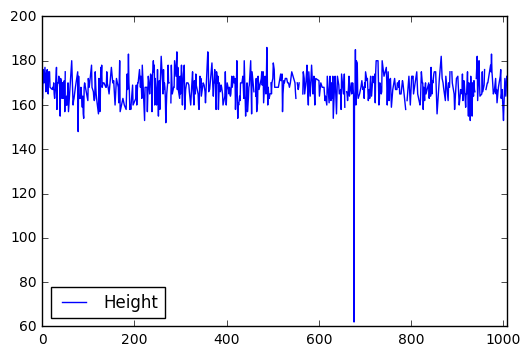

In [20]:
f_data.plot(y = 'Height')
plt.show()

In [38]:
f_data['Height'].min()

62.0

In [42]:
f_data[f_data['Height'] == f_data['Height'].min()].index.tolist()

[676]

In [43]:
f_data.loc[f_data[f_data['Height'] == f_data['Height'].min()].index.tolist(),'Height'] = 162.0

In [72]:
f_data['Height'].tolist()

[163.0,
 163.0,
 176.0,
 172.0,
 170.0,
 177.0,
 166.0,
 174.0,
 175.0,
 176.0,
 168.0,
 165.0,
 175.0,
 175.0,
 168.0,
 167.0,
 168.0,
 167.0,
 170.0,
 165.0,
 163.0,
 168.0,
 177.0,
 158.0,
 170.0,
 170.0,
 173.0,
 168.0,
 155.0,
 172.0,
 170.0,
 163.0,
 170.0,
 163.0,
 170.0,
 171.0,
 157.0,
 175.0,
 nan,
 160.0,
 164.0,
 160.0,
 165.0,
 170.0,
 157.0,
 180.0,
 160.0,
 162.0,
 163.0,
 168.0,
 175.0,
 148.0,
 173.0,
 163.0,
 163.0,
 163.0,
 168.0,
 159.0,
 164.0,
 156.0,
 154.0,
 168.0,
 170.0,
 162.0,
 172.0,
 168.0,
 178.0,
 168.0,
 166.0,
 163.0,
 162.0,
 163.0,
 175.0,
 169.0,
 165.0,
 161.0,
 156.0,
 172.0,
 157.0,
 163.0,
 177.0,
 173.0,
 178.0,
 168.0,
 170.0,
 170.0,
 170.0,
 168.0,
 168.0,
 175.0,
 170.0,
 168.0,
 165.0,
 177.0,
 170.0,
 171.0,
 160.0,
 172.0,
 168.0,
 161.0,
 180.0,
 157.0,
 163.0,
 160.0,
 158.0,
 174.0,
 167.0,
 169.0,
 183.0,
 170.0,
 166.0,
 158.0,
 160.0,
 158.0,
 169.0,
 160.0,
 163.0,
 169.0,
 160.0,
 170.0,
 170.0,
 176.0,
 168.0,
 173.0,
 163.0,
 1

In [85]:
bins = np.linspace(140, 210, 50)

plt.hist(f_data['Height'].tolist(), bins, range=(bins.min(), bins.max()), alpha = 0.7, label = 'Female')
plt.hist(m_data['Height'].tolist(), bins, range=(bins.min(), bins.max()), alpha = 0.7, label = 'Male')
plt.legend(loc = 'upper right')
plt.columns.name = 'Height (cm)'
plt.set_ylabel('Frequency of Height')
plt.title('Height Frequency between Male and Female')
plt.show()

AttributeError: 'module' object has no attribute 'columns'